Dataset Columns: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')
         Date  Price   Open   High    Low  Volume  Chg%
0  2024-11-06  77030  78300  78570  77030       0 -1.86
1  2024-11-05  78490  78224  78670  78160       0  0.11
2  2024-11-04  78401  78498  78642  78237       0 -0.54
3  2024-11-01  78829  78650  78887  78550       0  0.64
4  2024-10-31  78326  79264  79999  77803      90 -1.17
Stationarity Test for 'Price':


<ipython-input-1-60c0b1995468>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


ADF Statistic: -3.140151275156299
p-value: 0.02372101223380091
Critical Values:
   1%: -3.432695153897882
   5%: -2.8625761240269165
   10%: -2.567321560891903


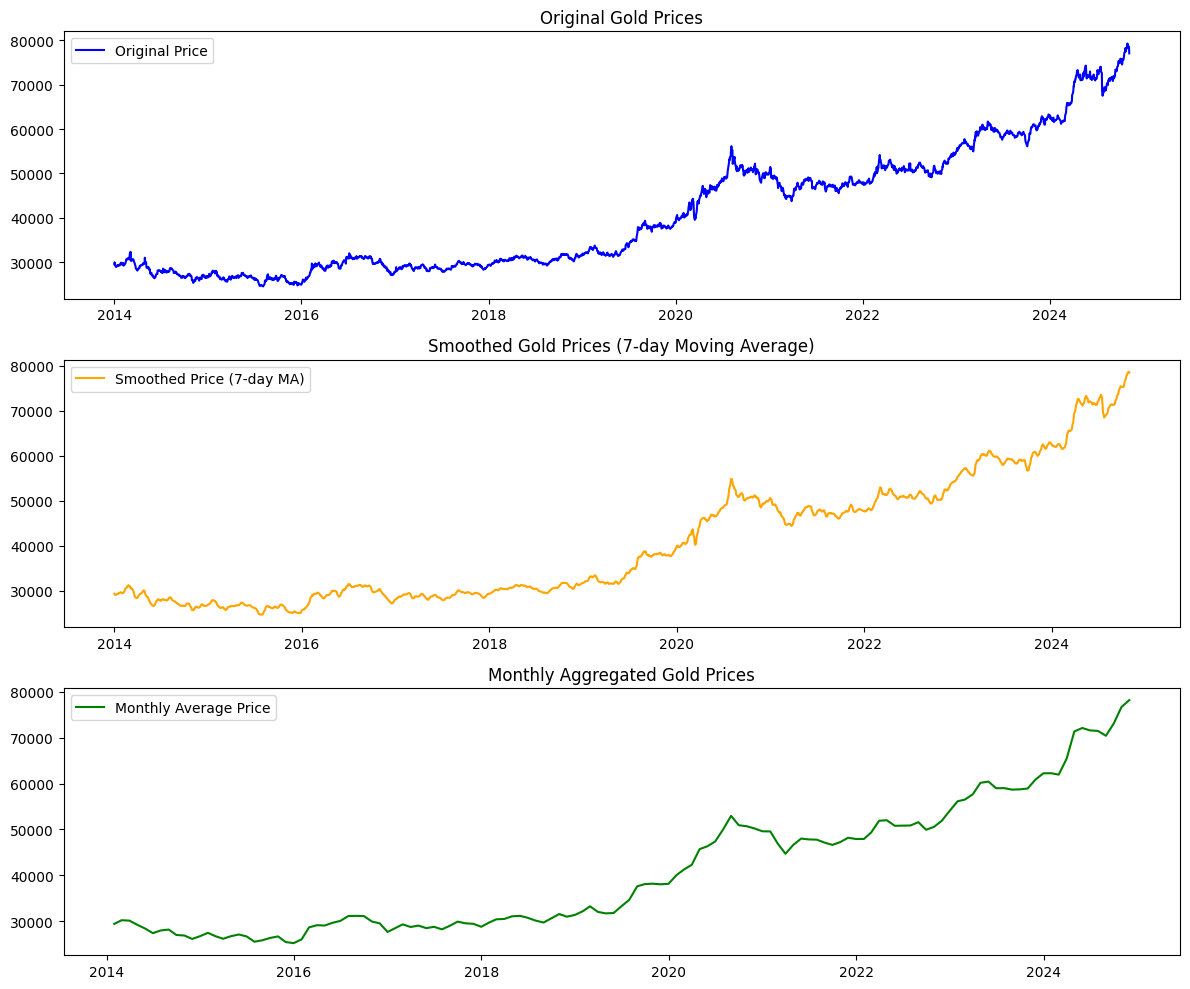

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = '/content/Gold Price.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print("Dataset Columns:", df.columns)
print(df.head())

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check if required columns exist
required_columns = ['Price']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Error: Column '{col}' not found in the dataset.")

# Apply 7-day moving average smoothing
df_smoothed = df.rolling(window=7).mean()

# Aggregate by month
df_monthly = df.resample('M').mean()

# Perform ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

print("Stationarity Test for 'Price':")
adf_test(df['Price'])

# Plotting the Data
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot original data
axes[0].plot(df.index, df['Price'], label='Original Price', color='blue')
axes[0].set_title('Original Gold Prices')
axes[0].legend()

# Plot smoothed data
axes[1].plot(df_smoothed.index, df_smoothed['Price'], label='Smoothed Price (7-day MA)', color='orange')
axes[1].set_title('Smoothed Gold Prices (7-day Moving Average)')
axes[1].legend()

# Plot aggregated data
axes[2].plot(df_monthly.index, df_monthly['Price'], label='Monthly Average Price', color='green')
axes[2].set_title('Monthly Aggregated Gold Prices')
axes[2].legend()

plt.tight_layout()
plt.show()
